In [78]:
import json
import os 
from path import Path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import keras



In [3]:
planes_path = Path(r'C:\Users\Bugra\Documents\GitHub\CNN_planes\data\Planes\planesnet\planesnet\planesnet')


In [4]:
planes = []

all_planes = os.listdir(planes_path)
    # Add them to the list
for ac in all_planes:
    planes.append((ac[0],str(planes_path)+"/"+str(ac)))

# Build a dataframe        
planes = pd.DataFrame(data=planes, columns=['label','image_path'], index=None)
planes.sample(5)

,label,image_path
31305,1,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
31301,1,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
11115,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
20374,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
28923,1,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...


Total Number of planes imgs in dataset :  32000


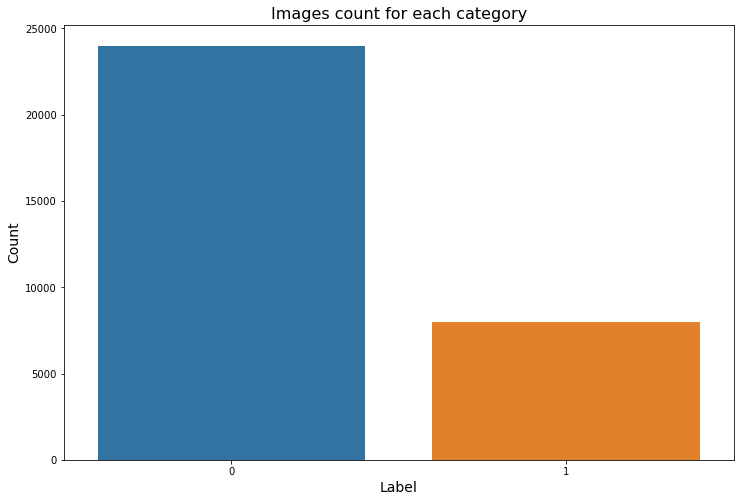

In [5]:
print("Total Number of planes imgs in dataset : ", len(planes))
ac_count = planes['label'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=ac_count.index, y=ac_count.values)
plt.title("Images count for each category", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

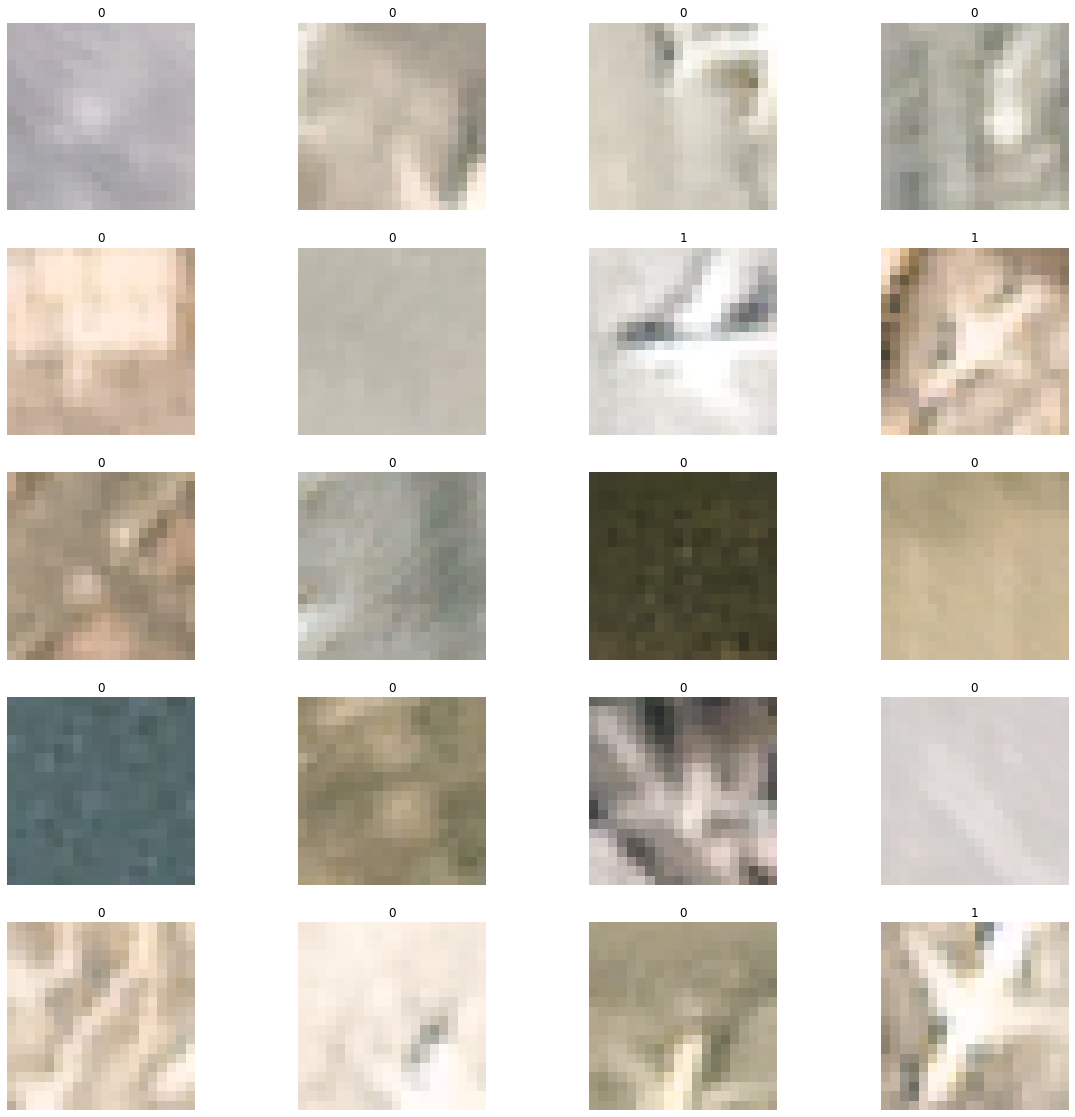

In [6]:
random_samples = []

for item in planes.sample(20).iterrows():
    random_samples.append((item[1].label, item[1].image_path))

f, ax = plt.subplots(5,4, figsize=(20,20))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(plt.imread(random_samples[i][1]))
    ax[i//4, i%4].set_title(random_samples[i][0])
    ax[i//4, i%4].axis('off')
plt.show() 

In [7]:
f = open(r'C:\Users\Bugra\Documents\GitHub\CNN_planes\data\Planes\planesnet\planesnet.json')
planesnet = json.load(f)
f.close()

In [110]:
X = np.array(planesnet["data"]) / 255.
X = X.reshape([-1,3,20,20]).transpose([0,2,3,1])
Y = np.array(planesnet['labels'])
Y = tf.keras.utils.to_categorical(Y, 2)

Let`s make sure data is scale by looking min and max value.

In [9]:
print(np.min(X[0]),np.max(X[0]))


0.38823529411764707 1.0


In [113]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train,y_test = train_test_split(X,Y,test_size=.20,random_state=42,shuffle=True)


In [133]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (25600, 20, 20, 3) (25600, 2)
Testing data shape :  (6400, 20, 20, 3) (6400, 2)


In [55]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU ,ReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tflearn.data_augmentation import ImageAugmentation

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [135]:
def Create_model():
    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(2,2),input_shape=(20,20,3),padding='same',activation='relu')) #first layer of our network
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(2,2),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
    return model
    

Base Model

In [136]:
base = Create_model()


In [137]:
batch_size = 16
epochs = 20
model = base.fit(x_train,y_train,batch_size=batch_size,epochs =epochs)


Train on 25600 samples
Epoch 1/20
25600/25600 [==============================] - 4s 141us/sample - loss: 0.2594 - binary_accuracy: 0.8907
Epoch 2/20
25600/25600 [==============================] - 4s 138us/sample - loss: 0.1499 - binary_accuracy: 0.9412
Epoch 3/20
25600/25600 [==============================] - 4s 145us/sample - loss: 0.1290 - binary_accuracy: 0.9515
Epoch 4/20
25600/25600 [==============================] - 4s 137us/sample - loss: 0.1184 - binary_accuracy: 0.9554
Epoch 5/20
25600/25600 [==============================] - 4s 140us/sample - loss: 0.1104 - binary_accuracy: 0.9572
Epoch 6/20
25600/25600 [==============================] - 4s 140us/sample - loss: 0.1065 - binary_accuracy: 0.9586
Epoch 7/20
25600/25600 [==============================] - 4s 138us/sample - loss: 0.1032 - binary_accuracy: 0.9614
Epoch 8/20
25600/25600 [==============================] - 4s 139us/sample - loss: 0.0973 - binary_accuracy: 0.9617
Epoch 9/20
25600/25600 [==============================] -

In [150]:

score, acc = base.evaluate(x_test, y_test, verbose = 0)
print(score,acc)
model_scores = {}
model_scores['Base']=acc

0.09154798446921632 0.96835935


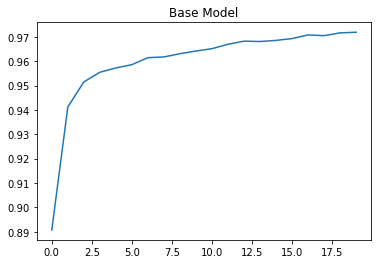

In [141]:
plt.plot(model.history['binary_accuracy'])
plt.title('Base Model')
plt.show()


In [142]:
epoch_model = Create_model()
batch_size = 16
epochs = 50
mod_1 = epoch_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.2966 - binary_accuracy: 0.8738
Epoch 2/50
25600/25600 [==============================] - 4s 146us/sample - loss: 0.1748 - binary_accuracy: 0.9311
Epoch 3/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.1492 - binary_accuracy: 0.9431
Epoch 4/50
25600/25600 [==============================] - 4s 145us/sample - loss: 0.1348 - binary_accuracy: 0.9479
Epoch 5/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.1308 - binary_accuracy: 0.9492
Epoch 6/50
25600/25600 [==============================] - 4s 146us/sample - loss: 0.1221 - binary_accuracy: 0.9527
Epoch 7/50
25600/25600 [==============================] - 4s 147us/sample - loss: 0.1184 - binary_accuracy: 0.9546
Epoch 8/50
25600/25600 [==============================] - 4s 150us/sample - loss: 0.1136 - binary_accuracy: 0.9571
Epoch 9/50
25600/25600 [==============================] -

In [152]:
score_epoc, acc_epoc =epoch_model.evaluate(x_test,y_test,verbose=0)
print(score_epoc,acc_epoc)
model_scores['Epoch'] = acc_epoc

0.09417683418781962 0.96625


No handles with labels found to put in legend.


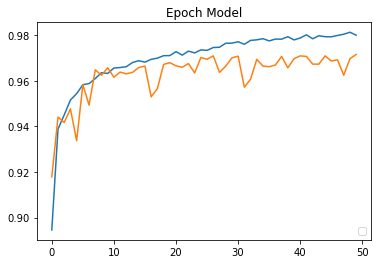

In [19]:

plt.plot(mod_1.history['binary_accuracy'])
plt.title('Epoch Model')
plt.legend(loc='lower right')
plt.show()



In [154]:
mod2 = Create_model()
batch_size=32
epochs=50
batch_mod = mod2.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 3s 108us/sample - loss: 0.2887 - binary_accuracy: 0.8789
Epoch 2/50
25600/25600 [==============================] - 3s 100us/sample - loss: 0.1592 - binary_accuracy: 0.9380
Epoch 3/50
25600/25600 [==============================] - 3s 104us/sample - loss: 0.1320 - binary_accuracy: 0.9486
Epoch 4/50
25600/25600 [==============================] - 3s 98us/sample - loss: 0.1179 - binary_accuracy: 0.9550
Epoch 5/50
25600/25600 [==============================] - 3s 99us/sample - loss: 0.1121 - binary_accuracy: 0.9564
Epoch 6/50
25600/25600 [==============================] - 3s 100us/sample - loss: 0.1070 - binary_accuracy: 0.9596
Epoch 7/50
25600/25600 [==============================] - 3s 101us/sample - loss: 0.1006 - binary_accuracy: 0.9628
Epoch 8/50
25600/25600 [==============================] - 3s 111us/sample - loss: 0.0991 - binary_accuracy: 0.9632
Epoch 9/50
25600/25600 [==============================] - 3

In [155]:
score_batch , acc_batch =mod2.evaluate(x_test,y_test,verbose=0)
model_scores['Batch1'] = acc_batch

No handles with labels found to put in legend.


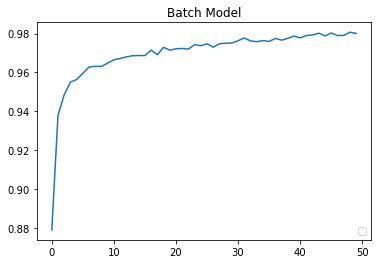

In [156]:
plt.plot(batch_mod.history['binary_accuracy'])
plt.title('Batch Model')
plt.legend(loc='lower right')
plt.show()

In [157]:
def kernel_model():


    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same',activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
    return model
    

Kernel has most effect till now

In [158]:
mod3 = kernel_model()
batch_size = 16
epochs = 20
_kernel_model = mod3.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Train on 25600 samples
Epoch 1/20
25600/25600 [==============================] - 5s 204us/sample - loss: 0.2302 - binary_accuracy: 0.9044
Epoch 2/20
25600/25600 [==============================] - 5s 192us/sample - loss: 0.1395 - binary_accuracy: 0.9481
Epoch 3/20
25600/25600 [==============================] - 5s 188us/sample - loss: 0.1176 - binary_accuracy: 0.9560
Epoch 4/20
25600/25600 [==============================] - 5s 195us/sample - loss: 0.1062 - binary_accuracy: 0.9600
Epoch 5/20
25600/25600 [==============================] - 5s 194us/sample - loss: 0.0993 - binary_accuracy: 0.9627
Epoch 6/20
25600/25600 [==============================] - 5s 194us/sample - loss: 0.0916 - binary_accuracy: 0.9647
Epoch 7/20
25600/25600 [==============================] - 5s 194us/sample - loss: 0.0860 - binary_accuracy: 0.9665
Epoch 8/20
25600/25600 [==============================] - 5s 195us/sample - loss: 0.0800 - binary_accuracy: 0.9701
Epoch 9/20
25600/25600 [==============================] -

In [159]:
score_kernel , acc_kernel =mod3.evaluate(x_test,y_test,verbose=0)
model_scores['Kernel'] = acc_kernel

No handles with labels found to put in legend.


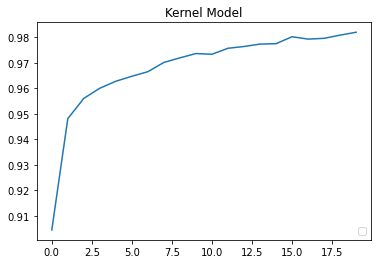

In [160]:
plt.plot(_kernel_model.history['binary_accuracy'])
plt.title('Kernel Model')
plt.legend(loc='lower right')
plt.show()

In [161]:
mod_4 = kernel_model()
batch_size =32
epochs = 50
batch_epoch = mod_4.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 3s 132us/sample - loss: 0.2577 - binary_accuracy: 0.8921
Epoch 2/50
25600/25600 [==============================] - 3s 124us/sample - loss: 0.1489 - binary_accuracy: 0.9423
Epoch 3/50
25600/25600 [==============================] - 3s 129us/sample - loss: 0.1226 - binary_accuracy: 0.9532
Epoch 4/50
25600/25600 [==============================] - 3s 128us/sample - loss: 0.1116 - binary_accuracy: 0.9571
Epoch 5/50
25600/25600 [==============================] - 3s 125us/sample - loss: 0.1048 - binary_accuracy: 0.9594
Epoch 6/50
25600/25600 [==============================] - 3s 128us/sample - loss: 0.0952 - binary_accuracy: 0.9637
Epoch 7/50
25600/25600 [==============================] - 3s 129us/sample - loss: 0.0932 - binary_accuracy: 0.9655
Epoch 8/50
25600/25600 [==============================] - 3s 127us/sample - loss: 0.0866 - binary_accuracy: 0.9673
Epoch 9/50
25600/25600 [==============================] -

In [164]:
score_krnl2 , acc_kernel2 = mod_4.evaluate(x_test,y_test,verbose=0)
model_scores['Kernel_2'] = acc_kernel2

No handles with labels found to put in legend.


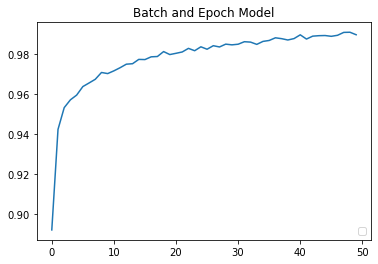

In [165]:
plt.plot(batch_epoch.history['binary_accuracy'])
plt.title('Batch and Epoch Model')
plt.legend(loc='lower right')
plt.show()

In [166]:
def leru_model():

    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
    return model

In [167]:
mod_5 = leru_model()
batch_size =32
epochs=50
base_kernel_leru = mod_5.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 4s 137us/sample - loss: 0.2858 - binary_accuracy: 0.8765
Epoch 2/50
25600/25600 [==============================] - 3s 136us/sample - loss: 0.1523 - binary_accuracy: 0.9409
Epoch 3/50
25600/25600 [==============================] - 4s 137us/sample - loss: 0.1253 - binary_accuracy: 0.9518
Epoch 4/50
25600/25600 [==============================] - 3s 133us/sample - loss: 0.1126 - binary_accuracy: 0.9569
Epoch 5/50
25600/25600 [==============================] - 4s 140us/sample - loss: 0.1003 - binary_accuracy: 0.9620
Epoch 6/50
25600/25600 [==============================] - 4s 140us/sample - loss: 0.0930 - binary_accuracy: 0.9638
Epoch 7/50
25600/25600 [==============================] - 4s 142us/sample - loss: 0.0879 - binary_accuracy: 0.9674
Epoch 8/50
25600/25600 [==============================] - 4s 140us/sample - loss: 0.0794 - binary_accuracy: 0.9703
Epoch 9/50
25600/25600 [==============================] -

In [168]:
score_leru , acc_leru = mod_5.evaluate(x_test,y_test,verbose=0)
model_scores['Leru'] = acc_leru

No handles with labels found to put in legend.


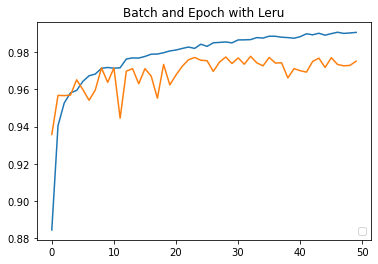

In [29]:
plt.plot(base_kernel_leru.history['binary_accuracy'])
plt.title('Batch and Epoch with Leru')
plt.legend(loc='lower right')
plt.show()

In [186]:
from keras.callbacks import EarlyStopping

early_callback = EarlyStopping(monitor='binary_accuracy',patience= 3)
mod_6 = leru_model()
batch_size =32
epochs=50
early_model = mod_6.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,callbacks=[early_callback])

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 4s 140us/sample - loss: 0.2742 - binary_accuracy: 0.8854
Epoch 2/50
25600/25600 [==============================] - 4s 139us/sample - loss: 0.1502 - binary_accuracy: 0.9406
Epoch 3/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.1196 - binary_accuracy: 0.9557
Epoch 4/50
25600/25600 [==============================] - 4s 144us/sample - loss: 0.1089 - binary_accuracy: 0.9577
Epoch 5/50
25600/25600 [==============================] - 4s 141us/sample - loss: 0.0977 - binary_accuracy: 0.9622
Epoch 6/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.0897 - binary_accuracy: 0.9651
Epoch 7/50
25600/25600 [==============================] - 4s 143us/sample - loss: 0.0858 - binary_accuracy: 0.9673
Epoch 8/50
25600/25600 [==============================] - 4s 145us/sample - loss: 0.0809 - binary_accuracy: 0.9687
Epoch 9/50
25600/25600 [==============================] -

In [187]:
score_early, acc_early = mod_6.evaluate(x_test,y_test,verbose=0)
model_scores['Early'] = acc_early

No handles with labels found to put in legend.


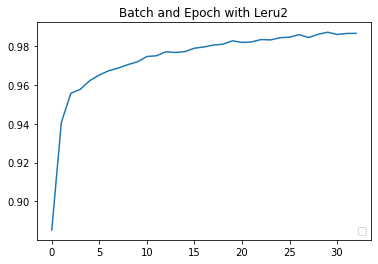

In [188]:
plt.plot(early_model.history['binary_accuracy'])
plt.title('Batch and Epoch with Leru2')
plt.legend(loc='lower right')
plt.show()

In [189]:
def leru_drop():

    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['binary_accuracy'])
    return model

In [190]:
early_callback = EarlyStopping(monitor='binary_accuracy',patience= 3)
mod_7 = leru_model()
batch_size =32
epochs=50
early_model = mod_7.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,callbacks=[early_callback])

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 4s 145us/sample - loss: 0.2567 - binary_accuracy: 0.8940
Epoch 2/50
25600/25600 [==============================] - 3s 133us/sample - loss: 0.1407 - binary_accuracy: 0.9443
Epoch 3/50
25600/25600 [==============================] - 3s 132us/sample - loss: 0.1132 - binary_accuracy: 0.9576
Epoch 4/50
25600/25600 [==============================] - 3s 132us/sample - loss: 0.1021 - binary_accuracy: 0.9622
Epoch 5/50
25600/25600 [==============================] - 3s 135us/sample - loss: 0.0937 - binary_accuracy: 0.9642
Epoch 6/50
25600/25600 [==============================] - 3s 134us/sample - loss: 0.0837 - binary_accuracy: 0.9681
Epoch 7/50
25600/25600 [==============================] - 3s 133us/sample - loss: 0.0802 - binary_accuracy: 0.9692
Epoch 8/50
25600/25600 [==============================] - 3s 134us/sample - loss: 0.0773 - binary_accuracy: 0.9702
Epoch 9/50
25600/25600 [==============================] -

In [191]:
score_drop, acc_drop = mod_7.evaluate(x_test,y_test,verbose=0)
model_scores['Early and Drop'] = acc_drop

No handles with labels found to put in legend.


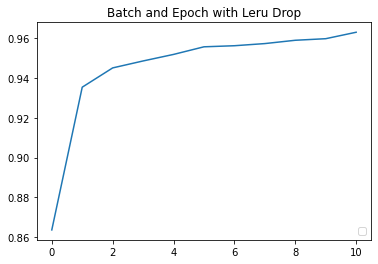

In [192]:
plt.plot(drop_model.history['binary_accuracy'])
plt.title('Batch and Epoch with Leru Drop')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def sgd():

    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='SGD',metrics=['binary_accuracy'])
    return model

In [ ]:
mod_8 = sgd()
batch_size=32
epochs=50
sgd_model = mod_8.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)

In [ ]:
score_sgd , acc_sgd = mod_8.evaluate(x_test,y_test,verbose=0)
model_scores['Sgd'] = acc_sgd

No handles with labels found to put in legend.


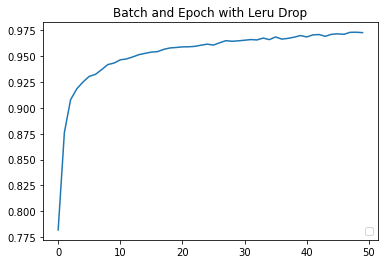

In [179]:
plt.plot(sgd_model.history['binary_accuracy'])
plt.title('Batch and Epoch with Leru Drop')
plt.legend(loc='lower right')
plt.show()

In [180]:
def sgd():

    model = Sequential()#Create our Model
    #First Layer
    model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

    #Second Layer
    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(alpha=.2)) 
    model.add(Dropout(.2))



    #Flatten
    model.add(Flatten())
    model.add(Dense(64))
    model.add(Dense(2, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='SGD',metrics=['binary_accuracy'])
    return model

In [181]:
mod_9 = sgd()
batch_size=32
epochs=50
sigmoid_mod = mod_9.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)

Train on 25600 samples
Epoch 1/50
25600/25600 [==============================] - 5s 183us/sample - loss: 0.5235 - binary_accuracy: 0.7569
Epoch 2/50
25600/25600 [==============================] - 5s 190us/sample - loss: 0.3685 - binary_accuracy: 0.8217
Epoch 3/50
25600/25600 [==============================] - 5s 189us/sample - loss: 0.2841 - binary_accuracy: 0.8804
Epoch 4/50
25600/25600 [==============================] - 5s 187us/sample - loss: 0.2450 - binary_accuracy: 0.9028
Epoch 5/50
25600/25600 [==============================] - 5s 184us/sample - loss: 0.2218 - binary_accuracy: 0.9151
Epoch 6/50
25600/25600 [==============================] - 5s 184us/sample - loss: 0.2075 - binary_accuracy: 0.9190
Epoch 7/50
25600/25600 [==============================] - 5s 186us/sample - loss: 0.1970 - binary_accuracy: 0.9237
Epoch 8/50
25600/25600 [==============================] - 5s 185us/sample - loss: 0.1884 - binary_accuracy: 0.9273
Epoch 9/50
25600/25600 [==============================] -

No handles with labels found to put in legend.


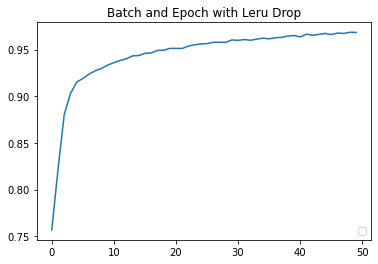

In [182]:
plt.plot(sigmoid_mod.history['binary_accuracy'])
plt.title('Batch and Epoch with Leru Drop')
plt.legend(loc='lower right')
plt.show()

In [184]:
score_sgd_s , acc_sgd_s = mod_9.evaluate(x_test,y_test,verbose=0)
model_scores['Sgd with Sigmoid'] = acc_sgd_s

In [226]:
df = pd.DataFrame(model_scores,index=[0])

In [239]:
from keras.preprocessing.image import ImageDataGenerator

In [254]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range = 0.1,horizontal_flip=True)
datagen.fit(x_train)
mod2.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
epochs=50,steps_per_epoch=x_train.shape[0]// batch_size,
validation_data =(x_test,y_test))

Epoch 1/50
800/800 [==============================] - 7s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0907 - binary_accuracy: 0.9658 - val_loss: 0.0789 - val_binary_accuracy: 0.9731
Epoch 2/50
800/800 [==============================] - 7s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0907 - binary_accuracy: 0.9659 - val_loss: 0.0765 - val_binary_accuracy: 0.9715
Epoch 3/50
800/800 [==============================] - 7s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0900 - binary_accuracy: 0.9666 - val_loss: 0.0819 - val_binary_accuracy: 0.9702
Epoch 4/50
800/800 [==============================] - 7s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0891 - binary_accuracy: 0.9659 - val_loss: 0.0862 - val_binary_accuracy: 0.9682
Epoch 5/50
800/800 [==============================] - 8s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0868 - binary_accuracy: 0.9673 - val_loss: 0.0741 - val_binary_accuracy: 0.9741
Epoch 6/50
800/800 [==============================

In [255]:
scoe_l, acc_l =mod2.evaluate(x_test,y_test,verbose=0)
print(acc_l)

0.9730469


,Base,Epoch,Batch1,Kernel,Kernel_2,Leru,Early,Early and Drop,Sgd,Sgd with Sigmoid
0,0.968359,0.96625,0.976484,0.973125,0.970469,0.975156,0.97625,0.973437,0.948438,0.969141


In [250]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range = 0.1,horizontal_flip=True)
datagen.fit(x_train)
earl_hist=mod_6.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
epochs=50,steps_per_epoch=x_train.shape[0]// batch_size,
validation_data =(x_test,y_test))

Epoch 1/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.1102 - binary_accuracy: 0.9592 - val_loss: 0.0902 - val_binary_accuracy: 0.9677
Epoch 2/50
800/800 [==============================] - 8s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0979 - binary_accuracy: 0.9625 - val_loss: 0.0847 - val_binary_accuracy: 0.9700
Epoch 3/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0879 - binary_accuracy: 0.9658 - val_loss: 0.0962 - val_binary_accuracy: 0.9631
Epoch 4/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0887 - binary_accuracy: 0.9662 - val_loss: 0.0626 - val_binary_accuracy: 0.9773
Epoch 5/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0857 - binary_accuracy: 0.9678 - val_loss: 0.0687 - val_binary_accuracy: 0.9773
Epoch 6/50
800/800 [==========================

In [256]:
score_l1, acc_l1 =mod_6.evaluate(x_test,y_test,verbose=0)
print(score_l1,acc_l)

0.07784108584979549 0.9730469


In [253]:
datagen = ImageDataGenerator(rotation_range=20, zoom_range = 0.1,horizontal_flip=True)
datagen.fit(x_train)
leru_hist=mod_5.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
epochs=50,steps_per_epoch=x_train.shape[0]// batch_size,
validation_data =(x_test,y_test))

Epoch 1/50
800/800 [==============================] - 8s 9ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.1047 - binary_accuracy: 0.9613 - val_loss: 0.0776 - val_binary_accuracy: 0.9730
Epoch 2/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0953 - binary_accuracy: 0.9640 - val_loss: 0.0789 - val_binary_accuracy: 0.9703
Epoch 3/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0886 - binary_accuracy: 0.9672 - val_loss: 0.0689 - val_binary_accuracy: 0.9748
Epoch 4/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0870 - binary_accuracy: 0.9670 - val_loss: 0.0665 - val_binary_accuracy: 0.9772
Epoch 5/50
800/800 [==============================] - 8s 10ms/step - batch: 399.5000 - size: 32.0000 - loss: 0.0842 - binary_accuracy: 0.9684 - val_loss: 0.0779 - val_binary_accuracy: 0.9736
Epoch 6/50
800/800 [==========================

In [257]:
score_5 , acc_5 = mod_5.evaluate(x_test,y_test,verbose=0)
print(acc_5)

0.97375
